# WEEK 3 - Assignment 1.1

#Chapter 1

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [63]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [64]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

##Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [66]:
import nsfg

In [67]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [68]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [69]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [70]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [71]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [72]:
pregordr[0]

1

Select a slice from a column.

In [73]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [74]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [75]:
#preg.outcome.value_counts().sort_index()
#value label Total
#1 LIVE BIRTH 9148
#2 INDUCED ABORTION 1862
#3 STILLBIRTH 120
#4 MISCARRIAGE 1921
#5 ECTOPIC PREGNANCY 190
#6 CURRENT PREGNANCY 352

Check the values of another variable.

In [76]:
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy 
`DataFrame`.Use it to select the pregnancy outcomes for a single respondent.

In [77]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

In [78]:
## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the 
[codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [79]:
preg.birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use `isnull` to count the number of nans.

In [80]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the 
[codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [81]:
preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  
For example, here is the mean birthweight in pounds:

In [82]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.
Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax,
not dot notation.

In [83]:
preg["totalwgt_kg"] = preg.totalwgt_lb/2.2
preg.totalwgt_kg.mean()

3.302558389828807

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [84]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [85]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [86]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  
How old are the youngest and oldest respondents?

In [87]:
resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

In [88]:
'Youngest : ',  resp.age_r.min()

('Youngest : ', 15)

In [89]:
'Oldest : ' , resp.age_r.max()

('Oldest : ', 44)

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from 
`resp` for `caseid` 2298 like this:

In [90]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [91]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.500000
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.903409
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000


In [92]:
# How old is the respondent with `caseid` 1?

In [93]:
resp[resp.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [94]:
preg[preg.caseid==2298].prglngth 

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [95]:
preg[preg.caseid==5012].pregordr.apply(lambda x:  preg[preg.caseid==5012].totalwgt_lb if x == 1 else '')

,5515
5515,6.0


# WEEK 3 - Assignment 1.2

In [128]:
# DSC530-T302
# Week 3
# 1.2 Programming Assignment
# Author: Aarti Ramani
# Created Date: 12/16/2022
# Purpose: Program to match the pregnancy numbers in NSFG pregnancy data and respondents data
# ********************************************************************************************
# Change#:1 (Week 3)
# Change(s) Made: Version 1.0
# Date of Change: 12/16/2022
# Author: Aarti Ramani
# Change Approved by: N/A
# Date Moved to Production: N/A
# ********************************************************************************************
import thinkstats2
import numpy as np
from collections import defaultdict


def MakePregMap(df):
    """Make a map from caseid to list of preg indices.

    df: DataFrame

    returns: dict that maps from caseid to list of indices into `preg`
    """
    d = defaultdict(list)
    for index, caseid in df.caseid.iteritems():
        d[caseid].append(index)
    return d


def CleanFemResp(df):
    """Recodes variables from the respondent frame.

    df: DataFrame
    """
    pass


def CleanFemPreg(df):
    """Recodes variables from the pregnancy frame.

    df: DataFrame
    """
    # mother's age is encoded in centiyears; convert to years
    df.agepreg /= 100.0

    # birthwgt_lb contains at least one bogus value (51 lbs)
    # replace with NaN
    df.loc[df.birthwgt_lb > 20, 'birthwgt_lb'] = np.nan

    # replace 'not ascertained', 'refused', 'don't know' with NaN
    na_vals = [97, 98, 99]
    df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)
    df.hpagelb.replace(na_vals, np.nan, inplace=True)

    df.babysex.replace([7, 9], np.nan, inplace=True)
    df.nbrnaliv.replace([9], np.nan, inplace=True)

    # birthweight is stored in two columns, lbs and oz.
    # convert to a single column in lb
    # NOTE: creating a new column requires dictionary syntax,
    # not attribute assignment (like df.totalwgt_lb)
    df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0

    # due to a bug in ReadStataDct, the last variable gets clipped;
    # so for now set it to NaN
    df.cmintvw = np.nan


def ReadFemPreg(dct_file='2002FemPreg.dct',
                dat_file='2002FemPreg.dat.gz'):
    """Reads the NSFG pregnancy data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df


def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    """Reads the NSFG respondent data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    CleanFemResp(df)
    return df


def main():
    preg = ReadFemPreg()
    # print('TEST \n', preg[preg.caseid == 2298].caseid, ' + ', preg[preg.caseid == 2298].pregnum, ' -->', len(preg[preg.caseid == 2298].caseid))
    resp = ReadFemResp()
    cnt = 0
    # print('2nd \n', resp[resp.caseid == 2298].caseid, ' ', resp[resp.caseid == 2298].pregnum)
    # print(preg[preg.caseid == 2298])
    # print(resp.caseid == 2298)
    pregList = MakePregMap(preg)
    # print(pregList)
    # Match caseid in preg and resp to get pregnum. Preg num in preg df will be the count of rows
    for index, pregnum in resp.pregnum.iteritems():
        # print('Index : ', index, ' -->', resp.caseid[index], '-->',
        #       resp.pregnum[index], '-->', pregList[resp.caseid[index]],
        #       '-->', len(pregList[resp.caseid[index]]), '-->', preg.pregnum[index])
        if len(pregList[resp.caseid[index]]) != pregnum:
            print('Values don''t match for : ', 'CASE ID: ', resp.caseid[index], ' PREG NUM From RESP : ', pregnum
                  , ' PREG NUM from PREG : ', len(pregList[resp.caseid[index]]))
            cnt = cnt+1
    if cnt == 0:
        print('All matched!!')
    

if __name__ == '__main__':
    main()

All matched!!


# WEEK 3 - Assignment 2.1

In [129]:
import nsfg
import pandas as pd 
import thinkstats2
import thinkplot
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [130]:
preg = nsfg.ReadFemPreg()

In [132]:
# live= preg[preg.outcome == 1] 
firsts = preg[preg.birthord == 1]
others = preg[preg.birthord != 1]

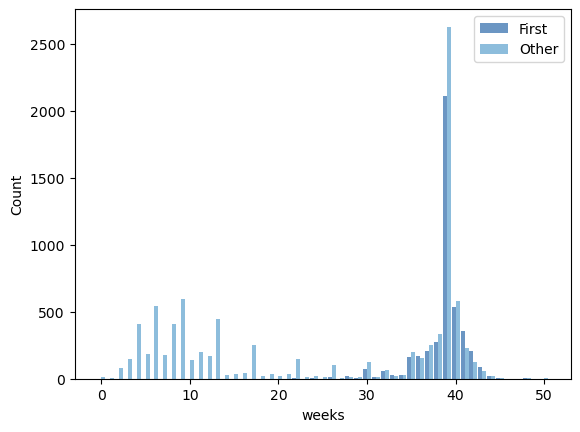

In [133]:
# live= preg[preg.outcome == 1] 
firsts = preg[preg.birthord == 1]
others = preg[preg.birthord != 1]
first_hist = thinkstats2.Hist(firsts.prglngth, label='First')
other_hist = thinkstats2.Hist(others.prglngth, label='Other')
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count')  

In [134]:
firstborn= firsts[['caseid', 'prglngth']]
otherborn = others[['caseid', 'prglngth']]

dump = pd.merge(firstborn,otherborn, on = ['caseid'])
dump 

,caseid,prglngth_x,prglngth_y
0,1,39,39
1,2,39,39
2,2,39,39
3,6,38,40
4,6,38,42
...,...,...,...
8215,12569,34,17
8216,12571,39,6
8217,12571,39,5
8218,12571,39,39


In [135]:
dump.drop_duplicates()

,caseid,prglngth_x,prglngth_y
0,1,39,39
1,2,39,39
3,6,38,40
4,6,38,42
5,7,39,35
...,...,...,...
8214,12568,39,3
8215,12569,34,17
8216,12571,39,6
8217,12571,39,5


In [138]:
dump["val"] = dump['prglngth_x'] > dump['prglngth_y']

In [141]:
dump = dump.drop_duplicates()
dump

,caseid,prglngth_x,prglngth_y,val
0,1,39,39,False
1,2,39,39,False
3,6,38,40,False
4,6,38,42,False
5,7,39,35,True
...,...,...,...,...
8214,12568,39,3,True
8215,12569,34,17,True
8216,12571,39,6,True
8217,12571,39,5,True


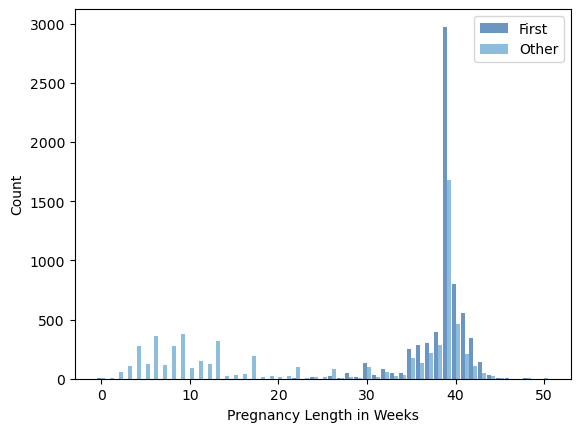

In [142]:
import thinkstats2
import thinkplot
 

first_hist = thinkstats2.Hist(dump.prglngth_x, label='First')
other_hist = thinkstats2.Hist(dump.prglngth_y, label='Other')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy Length in Weeks', ylabel='Count') 

In [144]:
dump.val.value_counts()

True     4107
False    2470
Name: val, dtype: int64

Looking at the values and the plot for pregnancy length greater for first born 
vs others, it appears first born babies arrive later than other.

# WEEK 3 - Assignment 2.2

#Chapter 2

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [146]:
import numpy as np

In [147]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Given a list of values, there are several ways to count the frequency of each value.

In [148]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [149]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [150]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [151]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [152]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [153]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [154]:
hist[4]

0

The `Values` method returns the values:

In [155]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [156]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

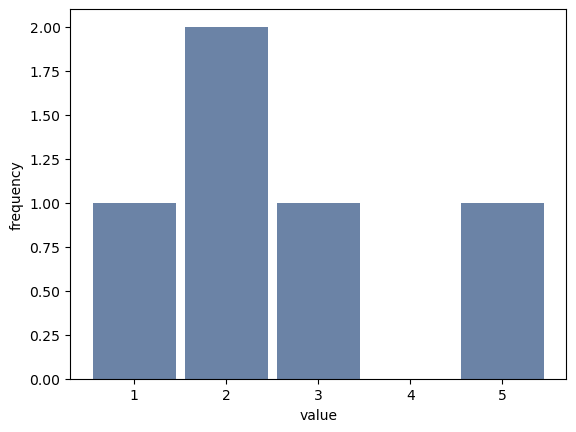

In [157]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [158]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [159]:
import nsfg

In [160]:
preg = nsfg.ReadFemPreg()
live= preg[preg.outcome == 1] 

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

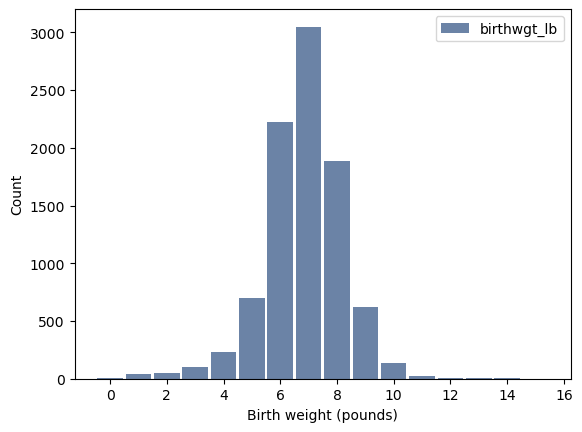

In [161]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [162]:
ages = np.floor(live.agepreg) 

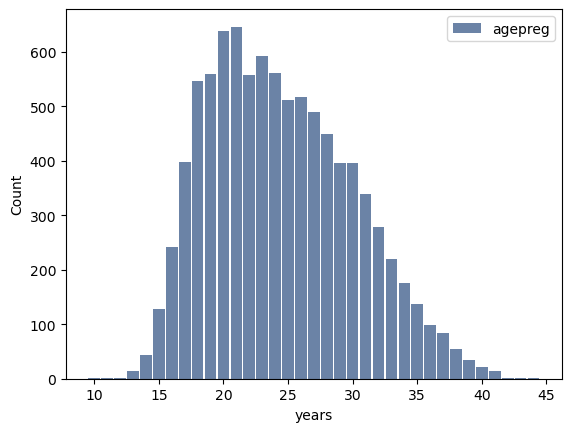

In [163]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

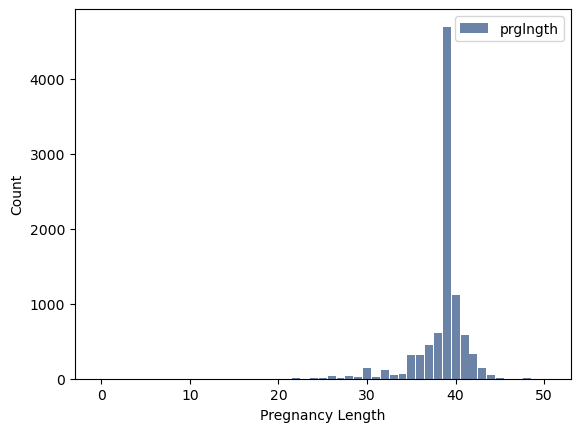

In [164]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = 'Pregnancy Length', ylabel = 'Count')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [165]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


Use `Largest` to display the longest pregnancy lengths.

In [166]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [167]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

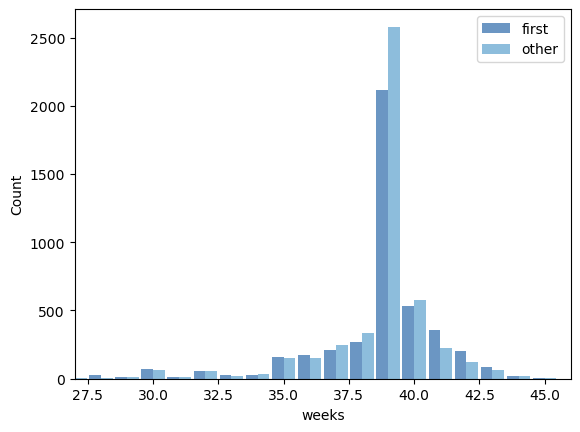

In [168]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46]) 

`Series` provides methods to compute summary statistics:

In [169]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std() 

Here are the mean and standard deviation:

In [170]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [171]:
std == np.sqrt(var)

True

Here's are the mean pregnancy lengths for first babies and others:

In [172]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [173]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [174]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [175]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [176]:
firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean()
print("First babies on an average are 0.124lbs lighter than others.")

First babies on an average are 0.124lbs lighter than others.


In [177]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

For the next few exercises, we'll load the respondent file:

In [178]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [179]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Female.pdf).

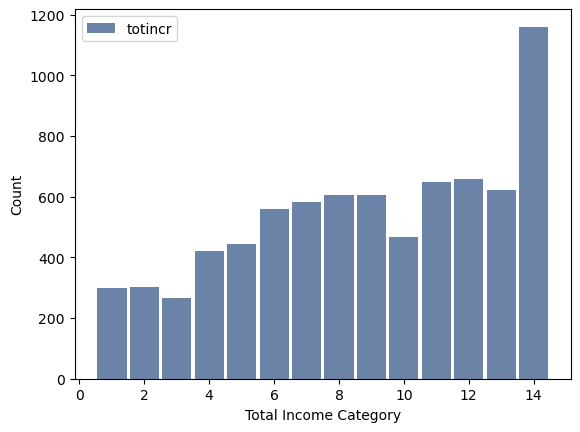

In [180]:
hist = thinkstats2.Hist(resp.totincr, label='totincr')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = 'Total Income Category', ylabel = 'Count')

In [181]:
test = resp[resp.totincr < 5000]
sum(test.totincr)
test.count(), resp.totincr.count(), resp.totincr.min(), resp.totincr.max()

(caseid         7643
 rscrinf        7643
 rdormres       7643
 rostscrn       7643
 rscreenhisp    7643
                ... 
 sest           7643
 cmintvw        7643
 cmlstyr        7643
 screentime     7643
 intvlngth      7643
 Length: 3087, dtype: int64,
 7643,
 1,
 14)

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

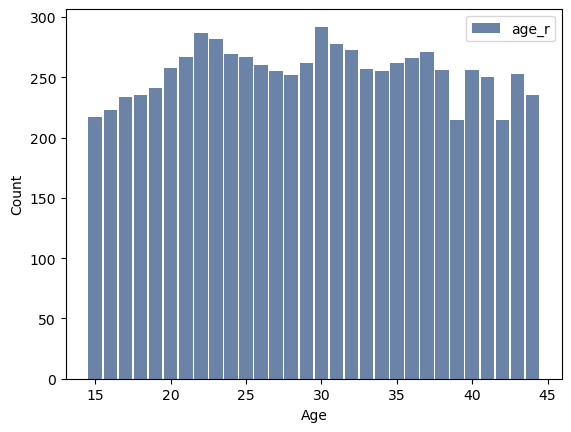

In [182]:
hist = thinkstats2.Hist(resp.age_r, label='age_r')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = 'Age', ylabel = 'Count')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

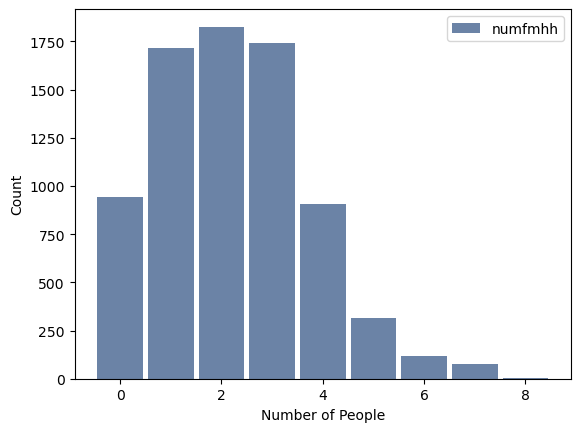

In [183]:
hist = thinkstats2.Hist(resp.numfmhh, label='numfmhh')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = 'Number of People', ylabel = 'Count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

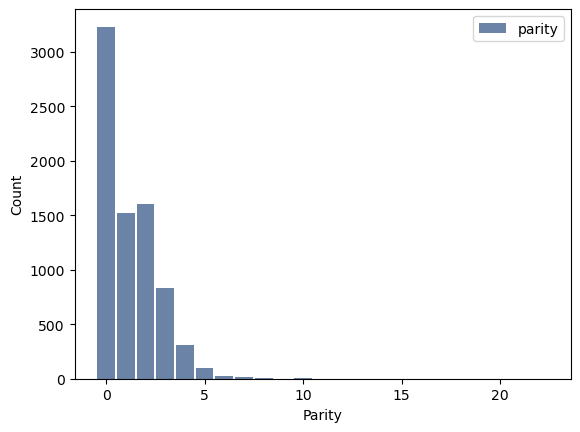

In [184]:
hist = thinkstats2.Hist(resp.parity, label='parity')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = 'Parity', ylabel = 'Count')
#Live births and number of children are inversely proprotional. As the number of 
#children increase, risk of not having a live child birth are high." 

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [185]:
hist.Largest()

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

In [186]:
# hist.Smallest()

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

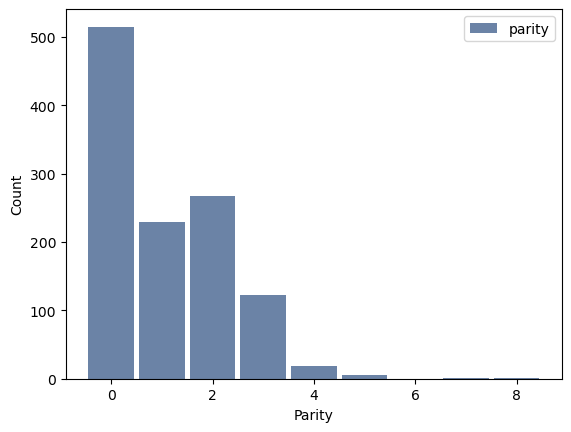

In [187]:
highincome = resp[resp.totincr == 14]
hist = thinkstats2.Hist(highincome.parity, label='parity')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = 'Parity', ylabel = 'Count')

Find the largest parities for high income respondents.

In [188]:
hist.Largest()

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [189]:
otherincome  = resp[resp.totincr != 14]
#otherincome.count()
highincome.parity.mean(), otherincome.parity.mean()

(1.0758620689655172, 1.2495758136665125)

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [190]:
CohenEffectSize(highincome.parity, otherincome.parity)

-0.1251185531466061

In [191]:
#This effect is about 10 times stronger than the difference in pregnancy length. 
#But remembering the design of the study, we should not make too much of this apparent effect."
0.028879044654449883
-0.1251185531466061

-0.1251185531466061

# WEEK 3 - Assignment 2.3

In [195]:
# DSC530-T302
# Week 3 - 2.3
# 1.2 Programming Assignment
# Author: Aarti Ramani
# Created Date: 12/16/2022
# Purpose: Program to match the pregnancy numbers in NSFG pregnancy data and respondents data
# ********************************************************************************************
# Change#:1 (Week 3)
# Change(s) Made: Version 1.0
# Date of Change: 12/16/2022
# Author: Aarti Ramani
# Change Approved by: N/A
# Date Moved to Production: N/A
# ********************************************************************************************
import thinkstats2
import numpy as np
from collections import defaultdict
from os.path import basename, exists
import thinkplot


def MakePregMap(df):
    """Make a map from caseid to list of preg indices.

    df: DataFrame

    returns: dict that maps from caseid to list of indices into `preg`
    """
    d = defaultdict(list)
    for index, caseid in df.caseid.iteritems():
        d[caseid].append(index)
    return d


def CleanFemResp(df):
    """Recodes variables from the respondent frame.

    df: DataFrame
    """
    pass


def CleanFemPreg(df):
    """Recodes variables from the pregnancy frame.

    df: DataFrame
    """
    # mother's age is encoded in centiyears; convert to years
    df.agepreg /= 100.0

    # birthwgt_lb contains at least one bogus value (51 lbs)
    # replace with NaN
    df.loc[df.birthwgt_lb > 20, 'birthwgt_lb'] = np.nan

    # replace 'not ascertained', 'refused', 'don't know' with NaN
    na_vals = [97, 98, 99]
    df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)
    df.hpagelb.replace(na_vals, np.nan, inplace=True)

    df.babysex.replace([7, 9], np.nan, inplace=True)
    df.nbrnaliv.replace([9], np.nan, inplace=True)

    # birthweight is stored in two columns, lbs and oz.
    # convert to a single column in lb
    # NOTE: creating a new column requires dictionary syntax,
    # not attribute assignment (like df.totalwgt_lb)
    df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0

    # due to a bug in ReadStataDct, the last variable gets clipped;
    # so for now set it to NaN
    df.cmintvw = np.nan


def ReadFemPreg(dct_file='2002FemPreg.dct',
                dat_file='2002FemPreg.dat.gz'):
    """Reads the NSFG pregnancy data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df


def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    """Reads the NSFG respondent data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    CleanFemResp(df)
    return df


def Mode(hist, hist_key):
    # print(hist_key)
    maxfreq = hist[hist_key].value_counts(ascending=False).head(1)
    # print(maxfreq.values)
    # print(maxfreq.index.values)
    return maxfreq


def AllModes(hist, hist_key):
    allfreq = hist[hist_key].value_counts(ascending=False)
    # print(allfreq)
    return allfreq


def main():
    try:
        preg = ReadFemPreg()
        resp = ReadFemResp()
        live = preg[preg.outcome == 1]
        try:
            searchcolumn = str(input('Please enter the column for which '
                                     'you would like to get the frequency : '))
        except RuntimeError as err:
            print('Invalid user input : ', err)
        else:
            columnname = [col for col in live.columns if searchcolumn == col]
            if len(columnname) > 0:
                try:
                    maxfreq = Mode(live, columnname[0])
                except RuntimeError as err:
                    print('Error in function <Mode>:', err)
                else:
                    if maxfreq.count() > 0:
                        print('Most frequent value in', columnname[0], ' is : '
                              , maxfreq.index.values,
                              ' with a count of : ', maxfreq.values)
                    else:
                        print('Function did not return any frequency for selected column')
                    try:
                        allfreq = AllModes(live, columnname[0])
                        if allfreq.count() > 0:
                            # print('Most frequent value in', columnname[0], ' is : ', 
                            #allfreq.index.values, ' with a count of : ', allfreq.values)
                            print("Most frequent value in column :", '\033[1m' + columnname[0] 
                                  + '\033[0m', '\n')
                            print('{:15}''{:1}'.format("Value", "Count"))
                            print('{:15}''{:1}'.format("---------", "-----------"))
                            for i in allfreq.index:  
                        # Add every key in the sorted list to the sorted-dictionary to print results
                                print("{:15} {:1}".format(str(i), str(allfreq[i])))
                        else:
                            print('Function did not return any frequency for selected column')
                    except RuntimeError as err:
                        print('Error in function <AllModes>:', err)
            else:
                print('Column does not exist.')
    except RuntimeError as err:
        print('We ran into an issue. ', err)


if __name__ == '__main__':
    main()


Please enter the column for which you would like to get the frequency : pregnum
Most frequent value in pregnum  is :  [3]  with a count of :  [2401]
Most frequent value in column : pregnum 

Value          Count
---------      -----------
3               2401
2               2189
4               1612
5               950
1               851
6               512
7               296
8               169
9               92
10              37
11              19
12              9
14              7
19              4


# WEEK 3 - Assignment 2.4

In [196]:
import nsfg
import pandas as pd 
import thinkstats2
import thinkplot
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [197]:
preg = nsfg.ReadFemPreg()

In [198]:
# live= preg[preg.outcome == 1] 
firsts = preg[preg.birthord == 1]
others = preg[preg.birthord != 1]
#firsts.columns 

In [199]:
first_hist = thinkstats2.Hist(firsts.totalwgt_lb, label='First')
other_hist = thinkstats2.Hist(others.totalwgt_lb, label='Other')

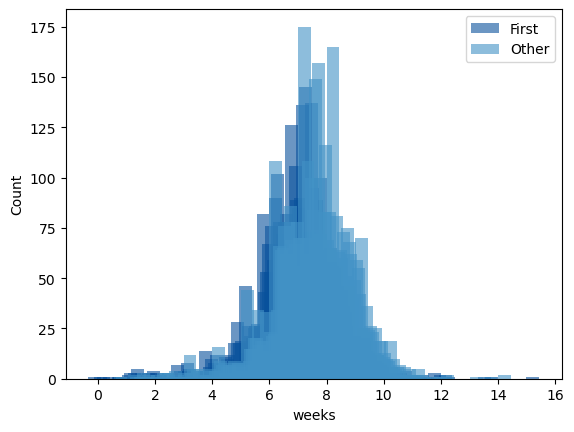

In [200]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count')  
# Based on the below plot, it appears weight of the first born is lesser 
#than other babies since the other (light blue) is dominant

In [201]:
firstborn= firsts[['caseid', 'totalwgt_lb']]
otherborn = others[['caseid', 'totalwgt_lb']]

dump = pd.merge(firstborn,otherborn, on = ['caseid'])
dump 

,caseid,totalwgt_lb_x,totalwgt_lb_y
0,1,8.8125,7.8750
1,2,9.1250,7.0000
2,2,9.1250,6.1875
3,6,8.5625,9.5625
4,6,8.5625,8.3750
...,...,...,...
8215,12569,6.3750,NaN
8216,12571,6.1875,NaN
8217,12571,6.1875,NaN
8218,12571,6.1875,7.5000


In [202]:
testlist = dump.drop_duplicates()
testlist

,caseid,totalwgt_lb_x,totalwgt_lb_y
0,1,8.8125,7.8750
1,2,9.1250,7.0000
2,2,9.1250,6.1875
3,6,8.5625,9.5625
4,6,8.5625,8.3750
...,...,...,...
8212,12566,6.0000,7.0000
8213,12568,6.3750,NaN
8215,12569,6.3750,NaN
8216,12571,6.1875,NaN


In [203]:
dump.drop_duplicates('caseid')

,caseid,totalwgt_lb_x,totalwgt_lb_y
0,1,8.8125,7.8750
1,2,9.1250,7.0000
3,6,8.5625,9.5625
5,7,7.5625,6.6250
6,14,7.0000,4.0000
...,...,...,...
8211,12565,6.4375,NaN
8212,12566,6.0000,7.0000
8213,12568,6.3750,NaN
8215,12569,6.3750,NaN


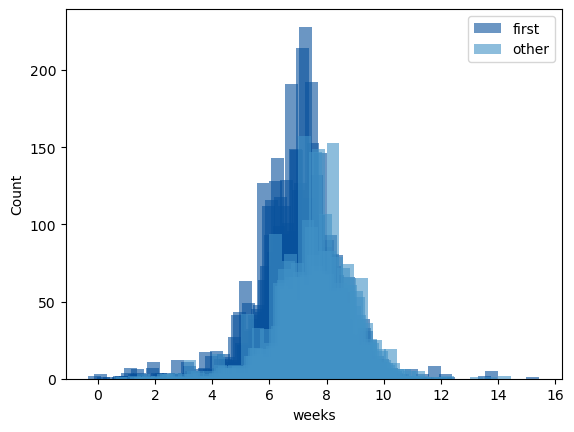

In [204]:
import thinkstats2
import thinkplot
 

first_hist = thinkstats2.Hist(testlist.totalwgt_lb_x, label='first')
other_hist = thinkstats2.Hist(testlist.totalwgt_lb_y, label='other')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count') 

Based on the plot, it appears weight of the first born is lesser then other babies 
since the other (light blue) is dominant

In [206]:
testlist = dump.drop_duplicates()

testlist["val"] = testlist['totalwgt_lb_x'] > testlist['totalwgt_lb_y']
testlist.val.value_counts()

C:\Users\aarti\AppData\Local\Temp\ipykernel_54628\3139696620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testlist["val"] = testlist['totalwgt_lb_x'] > testlist['totalwgt_lb_y']


False    4652
True     1891
Name: val, dtype: int64

Based on the bool value, True says first born and heavier than the other born. 
Count of first born with a weight over the other babies is lower (1891 < 4652) 

In [209]:
# Some additional test for duplicates
testlist.caseid.value_counts()

#635      8
#9466     8
#12477    7
#1169     7
#10442    6

test1 = testlist[testlist.caseid == 12477]
test1.drop_duplicates()

,caseid,totalwgt_lb_x,totalwgt_lb_y,val
8160,12477,7.75,6.0625,True
8161,12477,7.75,7.7500,False
8162,12477,7.75,6.7500,True
8163,12477,7.75,7.0625,True
8164,12477,7.75,8.0000,False
8166,12477,7.75,6.3750,True
8167,12477,7.75,6.1250,True
